# Ensemble classification test

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import ols_functions as of

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['figure.facecolor'] = 'white'

/usr/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## import variables previously saved for linear regression
Once nice thing about trees is that they don't care about distributions and scaling, so we don't need to do extensive feature scaling here.

In [2]:
reload(of)
allX, allY = of.get_data_for_ensemble()

In [4]:
allX.fillna(value=0, inplace=True)

In [6]:
print allX.shape
print allY.shape

(646441, 111)
(646441,)


## train/test/val data

In [7]:
with open('set_train.txt') as f:
    settrain = [t.strip() for t in f.readlines()]
with open('set_test.txt') as f:
    settest = [t.strip() for t in f.readlines()]
with open('set_val.txt') as f:
    setval = [t.strip() for t in f.readlines()]

In [8]:
df_train = allX.loc[settrain]
df_test = allX.loc[settest]
df_val = allX.loc[setval]

In [9]:
print df_train.shape
print df_val.shape
print df_test.shape

(287011, 111)
(90826, 111)
(123932, 111)


In [13]:
y_train = allY.loc[settrain]
y_val = allY.loc[setval]
y_test = allY.loc[settest]

In [16]:
print y_train.shape
print y_test.shape
print y_val.shape

(287011,)
(123932,)
(90826,)


In [17]:
for c in df_train.columns:
    print c

drdt
java
lowlevel
max_error_contest
max_error_practice
max_probability_contest
max_probability_practice
max_ratingdiff_contest
max_ratingdiff_practice
max_solvetime
max_timediff
max_wrong_contest
max_wrong_practice
mean_error_contest
mean_error_practice
mean_probability_contest
mean_probability_practice
mean_ratingdiff_contest
mean_ratingdiff_practice
mean_solvetime
mean_timediff
mean_wrong_contest
mean_wrong_practice
min_solvetime
min_timediff
n100
n200
n300
n400
n500
n_solved
n_unlikely01
n_unlikely02
newrating
performance
python
rank
smoothed_1months
smoothed_2months
smoothed_3months
smoothed_4months
smoothed_5months
std_error_contest
std_error_practice
std_probability_contest
std_probability_practice
std_ratingdiff_contest 
std_ratingdiff_practice
std_solvetime
std_timediff
std_wrong_contest
std_wrong_practice
tot_solvetime
total_contests
total_error_contest
total_error_practice
total_newtags
total_problems
total_wrong_contest
total_wrong_practice
unique_newtags
unique_tags_total


In [13]:
dropidx = np.isnan(yval_train)
df_train_ok = df_train[~dropidx]
yval_train_ok = yval_train[~dropidx]

dropidx = np.isnan(yval_test)
df_test_ok = df_test[~dropidx]
yval_test_ok = yval_test[~dropidx]

dropidx = np.isnan(yval_val)
df_val_ok = df_val[~dropidx]
yval_val_ok = yval_val[~dropidx]

## RF regressor

In [63]:
rfcf = RandomForestRegressor()

model = rfcf.fit(df_val_ok, yval_val_ok)

In [ ]:
test = model.decision_path(np.array(df_train_ok)[0,:])

In [65]:
print model.score(df_train_ok, yval_train_ok)
print model.score(df_test_ok, yval_test_ok)
print model.score(df_val_ok, yval_val_ok)

0.781608653871
0.755942054217
0.958760314031


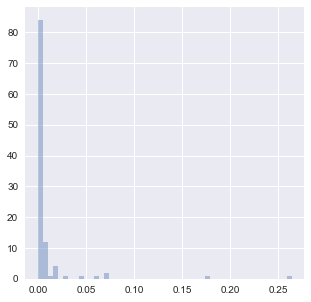

In [66]:
sns.distplot(model.feature_importances_, kde=False)

In [146]:
imp = pd.Series(model.feature_importances_)
imp.index = df_train.columns

In [ ]:
imp.sort_values(ascending=False)

###  try out LIME

KeyboardInterrupt: 

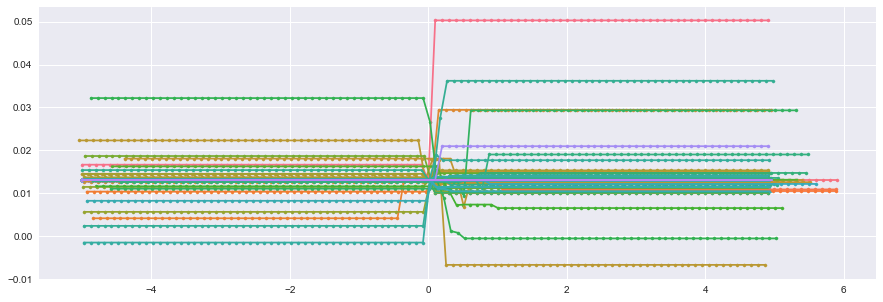

In [151]:
import copy

varidx = 5
nvars = 100
with sns.color_palette("husl", nvars):
    for varidx in range(nvars):
        eps = .1
        x = []
        y = []
        for i in range(-50, 50):
            testin = np.array(df_test_ok.iloc[5])
            testin = testin.reshape(1, -1)
            testin2 = testin.copy()
            testin2[0][varidx] += eps * i
            x.append(testin2[0][varidx])
            y.append(rfcf.predict(testin2))

        plt.rcParams['figure.figsize'] = (15, 5)
        plt.plot(x, y)
        plt.scatter(x, y, s=10)
    #    plt.title(df_train_ok.columns[varidx], fontsize=16)
plt.legend(df_train_ok.columns[0:nvars])

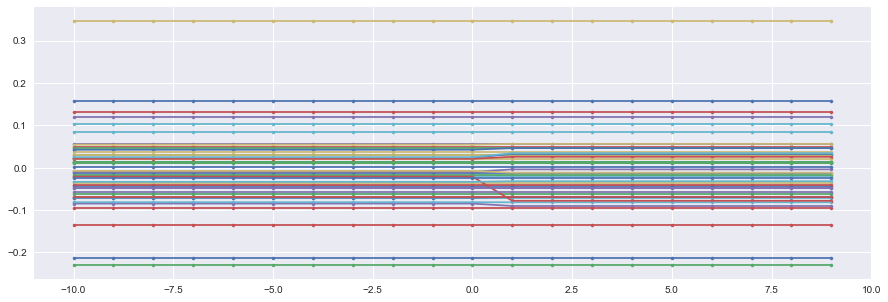

In [165]:
eps = 1
varidx = np.argwhere(df_test_ok.columns == 'graphs')[0]
for j in range(50):
    x = []
    y = []
    for i in range(-10, 10):
        testin = np.array(df_test_ok.iloc[j])
        testin = testin.reshape(1, -1)
        testin2 = testin.copy()
        testin2[0][varidx] += eps * i
        x.append(testin2[0][varidx])
        y.append(rfcf.predict(testin2))

    plt.rcParams['figure.figsize'] = (15, 5)
    plt.plot(x, y)
    plt.scatter(x, y, s=10)

In [150]:
imp.sort_values(ascending=False)

drdt                         0.263730
rank                         0.175584
total_contests               0.072868
mod_perf                     0.068738
smoothed_3months             0.059958
n_contest                    0.047277
oldrating                    0.027988
mean_timediff                0.018174
max_timediff                 0.017907
user_rating                  0.017440
std_timediff                 0.017431
performance                  0.015570
max_probability_contest      0.008878
mean_ratingdiff_contest      0.007975
std_probability_contest      0.007257
total_problems               0.007195
std_ratingdiff_contest       0.006658
max_ratingdiff_contest       0.006580
n_solved                     0.006549
mean_probability_contest     0.006059
std_solvetime                0.005910
max_ratingdiff_practice      0.005751
rating_diff_mean             0.005510
mean_wrong_contest           0.005398
mean_ratingdiff_practice     0.005192
mean_probability_practice    0.005168
min_timediff

# Use original unsmoothed dataset

In [166]:
df_rating = pd.read_csv('user_ratings_smoothed.csv')

df_rating.set_index(['handle', 'contestid'], inplace=True)

In [167]:
indices = indices[1:]

indices2 = [(x[0], int(x[1])) for x in indices]

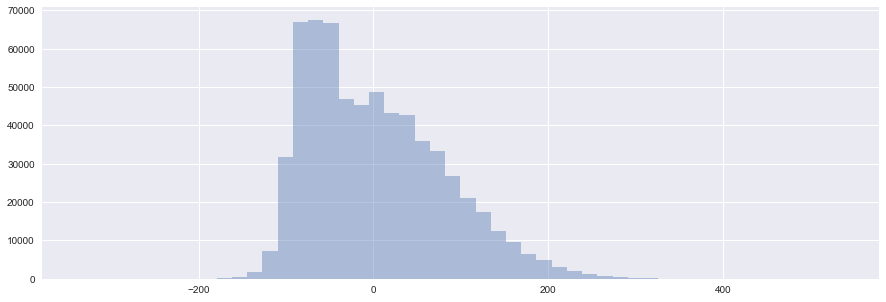

In [168]:
df_rating_subset = df_rating.loc[indices2, ['oldrating', 'newrating']]
df_rating_subset = df_rating_subset.reset_index(level=1)

df_delta = df_rating_subset.newrating - df_rating_subset.oldrating

sns.distplot(df_delta.dropna(), kde=False)

In [ ]:
df_train_ok.is_copy = False
df_rating_subset.is_copy = False
if 'oldrating' in df_train_ok.columns:
    df_train_ok.drop('oldrating', axis=1, inplace=True)
df_train_orig = df_train_ok.join(df_rating_subset)

In [ ]:
yval_train_orig = df_train_orig.newrating - df_train_orig.oldrating

In [ ]:
#df_train_orig.drop(['newrating', 'oldrating'], axis=1, inplace=True)
df_train_orig.drop(['newrating', 'oldrating'], axis=1, inplace=True)

In [ ]:
rf = RandomForestRegressor()
model = rf.fit(df_train_orig, yval_train_orig)

# playing around with test sets

In [ ]:
df_last = pd.read_csv('OLStrain_all_normalized_data_last.csv')

In [154]:
test = df_last.loc['chenmark', df_train.columns]

model.predict(test) * 532.75

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([-3.08058036])

In [176]:
model.score(df_val_ok, yval_val_ok)

0.87794472739190932

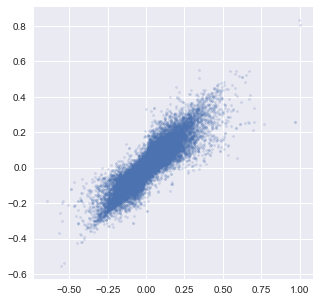

In [185]:
ypred = model.predict(df_test_ok)

plt.scatter(yval_test_ok, ypred, alpha=.2, s=5)

In [189]:
estimator = model
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

AttributeError: 'RandomForestRegressor' object has no attribute 'tree_'